In [45]:
import pandas as pd
import glob
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('pbj_nurse_2021_Q1.csv', error_bad_lines=False)
df= df.rename(columns=str.lower)

/Users/elee/.pyenv/versions/3.8.11/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 496904: expected 33 fields, saw 39\n'
/Users/elee/.pyenv/versions/3.8.11/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [217]:
df['provnum'] = df['provnum'].astype(str)

In [219]:
df[df['provnum'].str.contains('55505', na=False)]
df[df['provnum'] == '55505']
# x = df[df['provname'] == 'ARROYO VISTA NURSING CENTER']
# x['provnum'].iloc[0] == 55505

,provnum,provname,city,state,county_name,county_fips,cy_qtr,workdate,mdscensus,hrs_rndon,...,hrs_lpn_ctr,hrs_cna,hrs_cna_emp,hrs_cna_ctr,hrs_natrn,hrs_natrn_emp,hrs_natrn_ctr,hrs_medaide,hrs_medaide_emp,hrs_medaide_ctr
71010,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210101.0,44.0,0.0,...,0.0,77.21,77.21,0.0,26.62,26.62,0.0,0.0,0.0,0.0
71011,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210102.0,45.0,0.0,...,0.0,84.59,84.59,0.0,26.71,26.71,0.0,0.0,0.0,0.0
71012,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210103.0,45.0,0.0,...,0.0,91.99,91.99,0.0,29.09,29.09,0.0,0.0,0.0,0.0
71013,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210104.0,47.0,0.0,...,0.0,106.03,106.03,0.0,14.07,14.07,0.0,0.0,0.0,0.0
71014,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210105.0,44.0,0.0,...,0.0,103.14,103.14,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71095,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210327.0,49.0,0.0,...,0.0,100.77,100.77,0.0,7.24,7.24,0.0,0.0,0.0,0.0
71096,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210328.0,50.0,0.0,...,0.0,105.79,105.79,0.0,7.69,7.69,0.0,0.0,0.0,0.0
71097,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210329.0,51.0,0.0,...,0.0,106.17,106.17,0.0,0.00,0.00,0.0,0.0,0.0,0.0
71098,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,20210330.0,49.0,0.0,...,0.0,118.17,118.17,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [111]:
ensign_df = pd.read_csv('ensign_facilities.csv')
ensign_df = ensign_df.rename(columns={'ccn': 'provnum'})
ensign_df['provnum'] = ensign_df['provnum'].apply(lambda x: str(x).zfill(6))

In [188]:
# ensign_df.sample(10)
# ensign_df.to_csv('ensign_facilities.csv', index=False)

In [196]:
ensign_df[ensign_df['provnum'] == '055505']

,provnum,Location_WD_ID,Location_PCC_ID,Location_CC_ID,Location_Name,Location_ShortName,WD_ID,PCC_ID,ROX_SiteOfService_Key,ROX_SiteOfService_ID,...,Address,City,State_Code,Zip_Code,Region,Market,Cluster,Created_Date,Updated_Date,isDeleted
73,055505,22700,227,1223,Arroyo Vista Nursing Center,Arroyo Vista,777cbbb301d9102389c1bc547b2f62fd,4,14.0,317.0,...,3022 45th Street,San Diego,CA,92105,California,SD United,AFC Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False


In [229]:
ensign_df[ensign_df['City'] == 'San Diego']

,provnum,Location_WD_ID,Location_PCC_ID,Location_CC_ID,Location_Name,Location_ShortName,WD_ID,PCC_ID,ROX_SiteOfService_Key,ROX_SiteOfService_ID,...,Address,City,State_Code,Zip_Code,Region,Market,Cluster,Created_Date,Updated_Date,isDeleted
73,055505,22700,227,1223,Arroyo Vista Nursing Center,Arroyo Vista,777cbbb301d9102389c1bc547b2f62fd,4,14.0,317.0,...,3022 45th Street,San Diego,CA,92105,California,SD United,AFC Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False
81,555326,23500,235,1231,Carmel Mountain Rehabilitation and Healthcare ...,Carmel Mtn,777cbbb301d9102389c169cbb419628a,13,19.0,322.0,...,11895 Avenue of Industry,San Diego,CA,92128,California,SD United,AFC Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False
102,555739,29100,291,1235,The Springs at Pacific Regent La Jolla,The Springs,777cbbb301d9102389c23433520f63a7,113,138.0,441.0,...,3884 Nobel Drive,San Diego,CA,92122,California,SD United,AFC Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False
164,056182,45700,457,1323,Golden Hill Post Acute,Golden Hill,fc7eda3a008501c21497bc19b5019b61,353,276.0,580.0,...,1201 34th St.,San Diego,CA,92102-2416,California,SD United,Top Gun Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False
218,056401,65100,651,1256,Mission Hills Post Acute Care,Mission Hills,777cbbb301d9102389beffb2f7565f5b,153,167.0,470.0,...,3680 Reynard Way,San Diego,CA,92103,California,SD United,AFC Cluster,2021-07-23 14:49:44.460,2021-08-12 06:15:10.867,False


In [228]:
prov_nums = ensign_df['provnum'].squeeze().squeeze().tolist()
len(prov_nums)

241

In [230]:
prov_nums[0]

'455754'

In [157]:
# x = ensign_df[ensign_df['provnum'].duplicated(keep='first') == True]
# # drop repeated provnum
# x

In [231]:
# ensign_df[ensign_df['State_Code'] == 'CA']

In [232]:
def load_nurse_pbj_data(state, county, year, quarter):
    path = f"pbj_nurse_{year}" + f"_Q{quarter}" + ".csv"
    df = pd.read_csv(path, error_bad_lines=False)
    df= df.rename(columns=str.lower)
    df['provnum'] = df['provnum'].apply(lambda x: str(x).zfill(6))
    df['provnum'] = df['provnum'].astype(str)
    df = df[df['state'] == state]
    df = df[df['county_name'] == county]
    df['workdate'] = pd.to_datetime(df['workdate'], format="%Y%m%d")
    df['year'] = df['workdate'].dt.year
    df['month'] = df['workdate'].dt.month
    df['day'] = df['workdate'].dt.day
    df['day_name'] = df['workdate'].dt.day_name()
    df['is_weekend'] = (df['workdate'].dt.dayofweek // 5 == 1).astype(bool)
    save_path = f"{state}/{county}/{year}_q{quarter}" + ".csv"
    df.to_csv(save_path, index = False)
    return df

In [233]:
df_2021_q1 = load_nurse_pbj_data('CA', 'San Diego', 2021, 1)
df_2020_q4 = load_nurse_pbj_data('CA', 'San Diego', 2020, 4)
df_2020_q3 = load_nurse_pbj_data('CA', 'San Diego', 2020, 3)
df_2020_q2 = load_nurse_pbj_data('CA', 'San Diego', 2020, 2)
df_2020_q1 = load_nurse_pbj_data('CA', 'San Diego', 2020, 1)

/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/2331625114.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_2021_q1 = load_nurse_pbj_data('CA', 'San Diego', 2021, 1)
b'Skipping line 496904: expected 33 fields, saw 39\n'
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/2331625114.py:1: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2021_q1 = load_nurse_pbj_data('CA', 'San Diego', 2021, 1)
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/2331625114.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_2020_q4 = load_nurse_pbj_data('CA', 'San Diego', 2020, 4)
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/2331625114.py:2: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2020_q4 = load_n

In [234]:
df_2019_q4 = load_nurse_pbj_data('CA', 'San Diego', 2019, 4)
df_2019_q3 = load_nurse_pbj_data('CA', 'San Diego', 2019, 3)
df_2019_q2 = load_nurse_pbj_data('CA', 'San Diego', 2019, 2)
df_2019_q1 = load_nurse_pbj_data('CA', 'San Diego', 2019, 1)

/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/3282650044.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_2019_q4 = load_nurse_pbj_data('CA', 'San Diego', 2019, 4)
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/3282650044.py:1: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2019_q4 = load_nurse_pbj_data('CA', 'San Diego', 2019, 4)
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/3282650044.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_2019_q3 = load_nurse_pbj_data('CA', 'San Diego', 2019, 3)
/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_1244/3282650044.py:2: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  df_2019_q3 = load_nurse_pbj_data('CA', 'San Diego', 2019, 3)
/var/folders

In [246]:
df_2021_q1[df_2021_q1['provname'].str.contains('ARROYO')]

,provnum,provname,city,state,county_name,county_fips,cy_qtr,workdate,mdscensus,hrs_rndon,...,hrs_natrn_emp,hrs_natrn_ctr,hrs_medaide,hrs_medaide_emp,hrs_medaide_ctr,year,month,day,day_name,is_weekend
71010,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-01-01,44.0,0.0,...,26.62,0.0,0.0,0.0,0.0,2021,1,1,Friday,False
71011,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-01-02,45.0,0.0,...,26.71,0.0,0.0,0.0,0.0,2021,1,2,Saturday,True
71012,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-01-03,45.0,0.0,...,29.09,0.0,0.0,0.0,0.0,2021,1,3,Sunday,True
71013,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-01-04,47.0,0.0,...,14.07,0.0,0.0,0.0,0.0,2021,1,4,Monday,False
71014,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-01-05,44.0,0.0,...,0.00,0.0,0.0,0.0,0.0,2021,1,5,Tuesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71095,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-03-27,49.0,0.0,...,7.24,0.0,0.0,0.0,0.0,2021,3,27,Saturday,True
71096,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-03-28,50.0,0.0,...,7.69,0.0,0.0,0.0,0.0,2021,3,28,Sunday,True
71097,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-03-29,51.0,0.0,...,0.00,0.0,0.0,0.0,0.0,2021,3,29,Monday,False
71098,055505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73.0,2021Q1,2021-03-30,49.0,0.0,...,0.00,0.0,0.0,0.0,0.0,2021,3,30,Tuesday,False


In [235]:
def calc_census_mean_by_month(df, year, quarter, state, county):
    """
    return: quarterly df aggregated by month, and calculated bed occupancy
    """
    
    agg_dict = dict()
    save_path = f"{state}/{county}/{year}_q{quarter}_census_mean_by_month" + ".csv"
    for i in df.columns:
        if i == 'provnum' or i == 'month':
            continue
        elif i == 'mdscensus' or i == 'MDScensus':
            agg_dict[i] = 'mean'
        else:
            agg_dict[i] = 'first'
    agg_df = df.groupby(['provnum', 'month'], as_index=False).agg(agg_dict)
    
    # merge agg_df with bed_cert_numbers   
    merge_df = merge_with_bedcert(agg_df)
    
    merge_df = calc_occupancy(merge_df)
    merge_df['ensign'] = merge_df['provnum'].isin(prov_nums)
    
    merge_df.to_csv(save_path, index = False)
    return merge_df

In [236]:
bed_cert_df = pd.read_csv('certified_bed_numbers.csv')
def merge_with_bedcert(df):
    merge_df = pd.merge(
                    df,
                    bed_cert_df,
                    how = 'inner',
                    left_on = 'provnum',
                    right_on = 'provnum',
                    validate = 'many_to_one')
    assert len(merge_df) == len(df)
    return merge_df


def calc_occupancy(df):
    df['occupancy'] = df['mdscensus']/df['bedcert']
    return df

In [247]:
df_2019q1_mean = calc_census_mean_by_month(df_2019_q1, 2019, 1, 'CA', 'San Diego')
df_2019q2_mean = calc_census_mean_by_month(df_2019_q2, 2019, 2, 'CA', 'San Diego')
df_2019q3_mean = calc_census_mean_by_month(df_2019_q3, 2019, 3, 'CA', 'San Diego')
df_2019q4_mean = calc_census_mean_by_month(df_2019_q4, 2019, 4, 'CA', 'San Diego')
df_2020q1_mean = calc_census_mean_by_month(df_2020_q1, 2020, 1, 'CA', 'San Diego')
df_2020q2_mean = calc_census_mean_by_month(df_2020_q2, 2020, 2, 'CA', 'San Diego')
df_2020q3_mean = calc_census_mean_by_month(df_2020_q3, 2020, 3, 'CA', 'San Diego')
df_2020q4_mean = calc_census_mean_by_month(df_2020_q4, 2020, 4, 'CA', 'San Diego')
df_2021q1_mean = calc_census_mean_by_month(df_2021_q1, 2021, 1, 'CA', 'San Diego')

In [114]:
# check numbers
# x = df_2020_q1[df_2020_q1['provnum'] == 55698]
# y = x[x['month'] == 2]
# y['mdscensus'].mean()

88.75862068965517

In [251]:
df_2021q1_mean[df_2021q1_mean['ensign']== True]['provnum'].nunique()

15

In [255]:
def merge_by_year(year, state=None, county=None):
    concat_list = []
    path = ''
    if state is not None:
        path += f"{state}/"
        if county is not None:
            path += f"{county}/"
    
    all_files = glob.glob(path + "*.csv")
    
    for fn in all_files:
        if year in fn and 'mean' in fn:
            df = pd.read_csv(fn)
            concat_list.append(df)
    concat_df = pd.concat(concat_list, axis=0, ignore_index=True)
    
    concat_df.to_csv(path + year + '_all_quarters.csv', index=False)
    return concat_df

In [275]:
concat_2020_2021 = pd.concat([concat_2020, concat_2021], axis=0, ignore_index=True)

In [277]:
concat_2020_2021.to_csv('CA/San Diego/2020_2021_all_quarters.csv', index=False)

In [256]:
concat_2021 = merge_by_year('2021', 'CA', 'San Diego')
concat_2020 = merge_by_year('2020', 'CA', 'San Diego')
concat_2019 = merge_by_year('2019', 'CA', 'San Diego')

In [259]:
concat_2021_en = concat_2021[concat_2021['ensign'] == True]
concat_2021_en['provnum'].nunique()

15

In [258]:
concat_2020_en = concat_2020[concat_2020['ensign'] == True]
concat_2020_en['provnum'].nunique()

15

In [257]:
concat_2019_en = concat_2019[concat_2019['ensign'] == True]
concat_2019_en['provnum'].nunique()

30

Text(0.5, 0, 'certified bed occupancy')

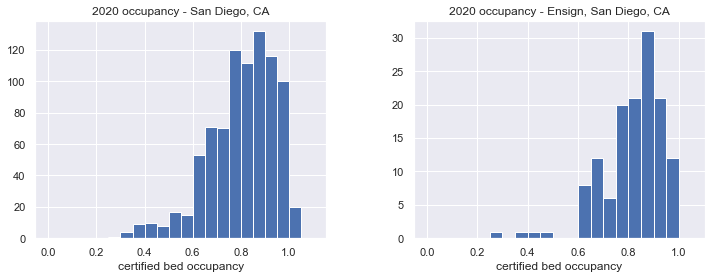

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
concat_2020.hist('occupancy', bins=np.arange(0, concat_2020['occupancy'].max() + 0.1, 0.05) , ax=axes[0])
axes[0].set_title('2020 occupancy - San Diego, CA')
axes[0].set_xlabel('certified bed occupancy')
concat_2020_en.hist('occupancy', bins=np.arange(0, concat_2020_en['occupancy'].max() + 0.1, 0.05) , ax=axes[1])
axes[1].set_title('2020 occupancy - Ensign, San Diego, CA')
axes[1].set_xlabel('certified bed occupancy')

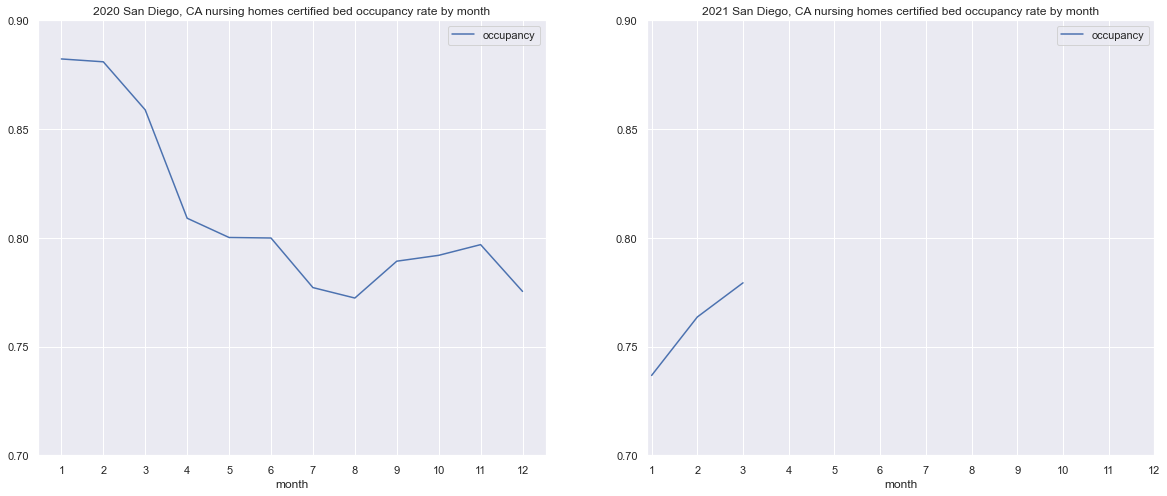

In [272]:
sns.set(rc={"figure.figsize":(20, 8)})
plt.subplots(1, 2)
plt.subplot(1,2,1)
concat_2020.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,13), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title= '2020 San Diego, CA nursing homes certified bed occupancy rate by month', legend=True);
plt.subplot(1,2,2)
concat_2021.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,13), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title= '2021 San Diego, CA nursing homes certified bed occupancy rate by month', legend=True);


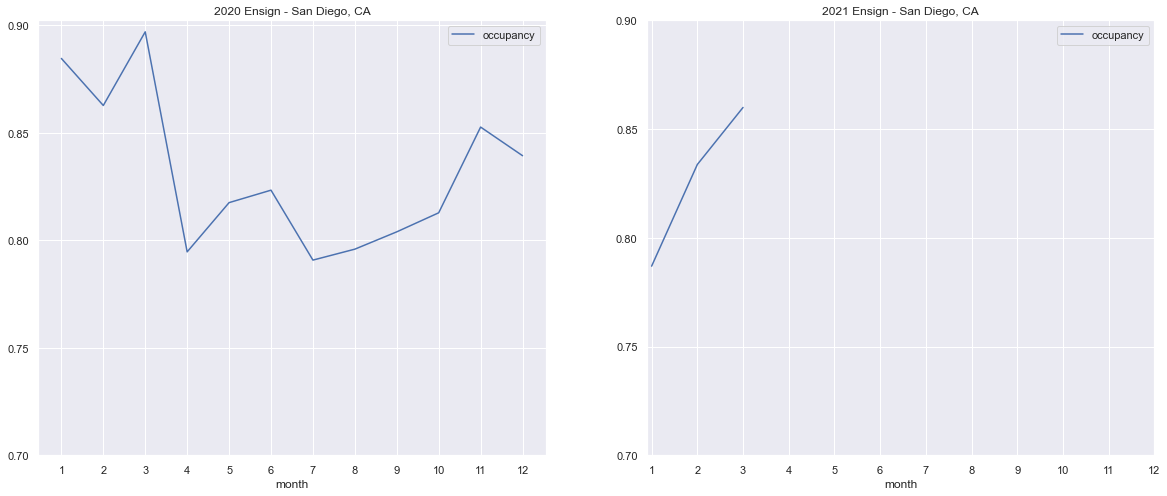

In [274]:
plt.subplots(1,2)
plt.subplot(1,2,1)
concat_2020_en.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,13), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title= '2020 Ensign - San Diego, CA', legend=True);
plt.subplot(1,2,2)
concat_2021_en.groupby('month')['occupancy'].mean().plot(xticks=np.arange(1,13), yticks=np.arange(0.7, 0.9, 0.05),
                                                     title= '2021 Ensign - San Diego, CA', legend=True);